<a href="https://colab.research.google.com/github/vaibhavbhawalkar/MLAlgorithms/blob/master/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.datasets as skds
import sklearn.preprocessing as pp
from sklearn.model_selection import train_test_split



In [9]:
dataset = skds.load_boston()

df = pd.DataFrame(dataset['data'])
df.columns = dataset['feature_names']
X = df.values
mms = pp.MinMaxScaler()
X = mms.fit_transform(X)
print(pd.DataFrame(X).head(3))


         0     1         2    3         4         5         6         7   \
0  0.000000  0.18  0.067815  0.0  0.314815  0.577505  0.641607  0.269203   
1  0.000236  0.00  0.242302  0.0  0.172840  0.547998  0.782698  0.348962   
2  0.000236  0.00  0.242302  0.0  0.172840  0.694386  0.599382  0.348962   

         8         9         10        11        12  
0  0.000000  0.208015  0.287234  1.000000  0.089680  
1  0.043478  0.104962  0.553191  1.000000  0.204470  
2  0.043478  0.104962  0.553191  0.989737  0.063466  


In [0]:

from math import floor


def LinearRegressor(X, y, inital_weight=0, initial_bias=0, n_batch=43, epochs=100, learning_rate=0.01):
    N, weight, bias, cost = float(len(y)), inital_weight, initial_bias, None
    x = X.reshape(n_batch, floor(len(X)/n_batch))
    for i in range(epochs):
        for Xi in X:
            y_pred = (weight * Xi) + bias
            diff = (y - y_pred)
            cost = sum([x**2 for x in diff]) / N
            weight_gradient = (-2 / N) * (sum([x for x in diff*Xi]))
            bias_gradient = (-2 / N) * (sum([x for x in diff]))
            weight -= learning_rate * weight_gradient
            bias -= learning_rate * bias_gradient
    return weight, bias, cost




In [0]:
X_train, x_test, y_train, y_test = train_test_split(
    X, dataset['target'] * 1000, test_size=0.15)

X_train, x_test = np.array([sum(x) for x in X_train]), np.array([
    sum(x) for x in x_test])



In [0]:
weight, bias, cost = LinearRegressor(X_train, y_train)

y_pred = weight * x_test + bias



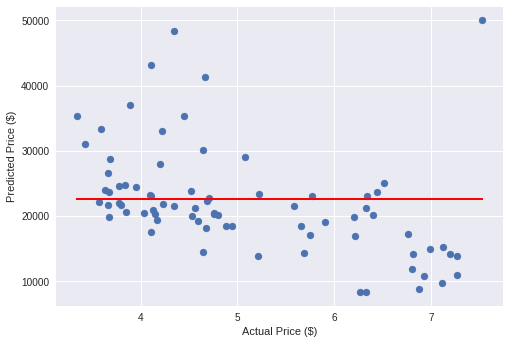

In [7]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color='red')
plt.xlabel('Actual Price ($)')
plt.ylabel('Predicted Price ($)')
plt.show()